In [3]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr

In [4]:
dfP = pd.read_csv("personAngles.csv").drop(columns =["personID"]).sort_values(by="usfID")
dfUSF = pd.read_csv("usfcmaidata.csv")

In [28]:
dfUSF.doi.unique()

array(['16sep2019'], dtype=object)

In [29]:
dfUSF.columns

Index(['pid', 'group', 'time', 'doi', 'cmai', 'pnab', 'pagb', 'vnab', 'vagb',
       'doi0', 'cmaibase', 'pnbase', 'pabase', 'vnbase', 'vabase', 'female',
       'race', 'marital', 'edu', 'dtype', 'stage', 'weight', 'hyp', 'chol',
       'hear', 'dm', 'arth', 'hf', 'depr', 'ckd', 'oste', 'copd', 'afib',
       'canc', 'sleeprx', 'excl', 'age', 'chron', 'days'],
      dtype='object')

## select choice of score below

In [30]:
dfUSF =dfUSF[dfUSF["pid"].isin(dfP.usfID)]
dfUSF =dfUSF[dfUSF["doi"]=="16sep2019"].sort_values(by="pid")
scoreChoice = "pnab"
scores = dfUSF[scoreChoice].values
ids = dfUSF.pid.values
scores

array([ 6, 19, 12, 16, 20, 13,  8])

In [31]:
cvScores = dfP.drop(columns="usfID").values
cvCols  = dfP.drop(columns="usfID").columns.values

In [32]:
cvScores.shape

(7, 18)

# Check for visual correlation

['thetaL0' 'thetaR0' 'distL0' 'distR0' 'thetaL1' 'thetaR1' 'distL1'
 'distR1' 'thetaL2' 'thetaR2' 'distL2' 'distR2' 'thetaL3' 'thetaR3'
 'distL3' 'distR3' 'thetaTotal' 'distTotal']
(18,)


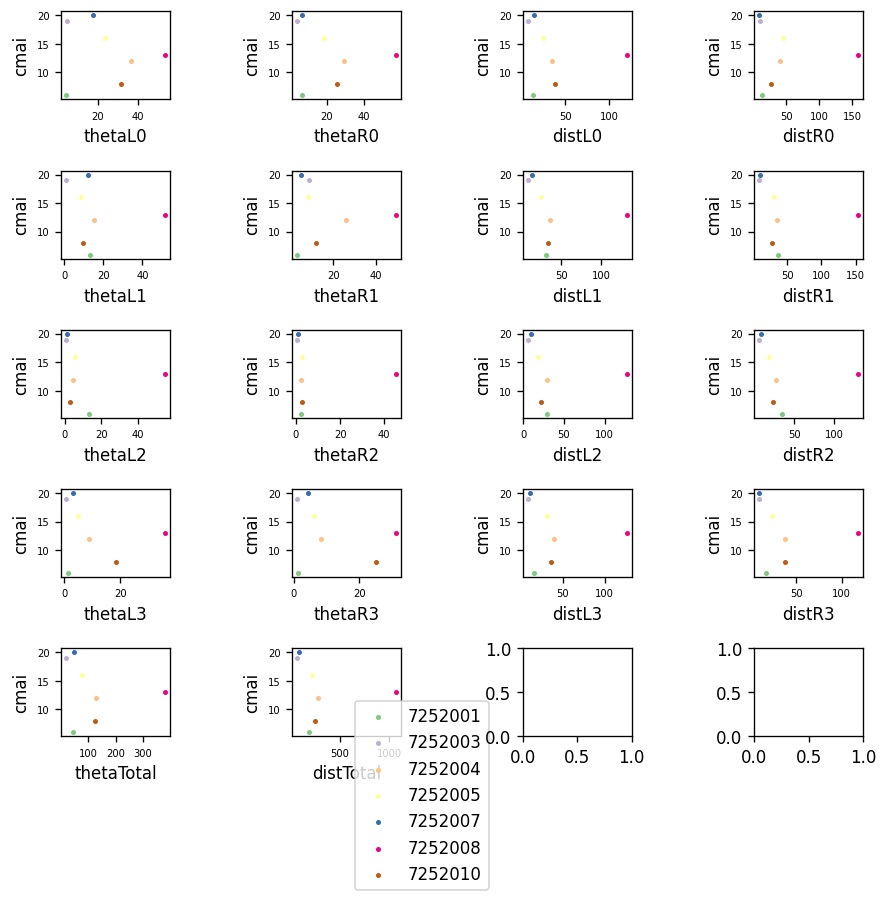

In [33]:
print(cvCols)
print(cvCols.shape)
import matplotlib.pyplot as plt
fig,axs = plt.subplots(5,4, figsize= (7.5,7.5), dpi=120)
colors = ["#7fc97f", "#beaed4","#fdc086","#ffff99","#386cb0","#f0027f","#bf5b17"]
for i,ax in enumerate(axs.ravel()):
    vals=np.take(cvScores,i,axis=1)

    # ax.scatter(vals,scores,s=4,c=colors, label=ids)
    
    for j in range(len(vals)):
        ax.scatter(vals[j],scores[j],s=4,c=colors[j],label=ids[j])
    
    ax.set_xlabel(cvCols[i])
    ax.set_ylabel("cmai")
    ax.tick_params(axis='both', labelsize= 6)
    if i==17:
        ax.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5) )
        break
        
plt.tight_layout()
plt.show()

# Could not identify any to observe any visible corrleation between the cmai score and the cvScores

### thetaL0, thetaR0, thetaR1, thetaL1, distR0 seem to be somewhat correlated

### Performing correlation tests to see if there is any statistical correlations

# Perform a spearman correlation test
### does not assume normal distribution
### null hypothesis - two datasets are uncorrelated


In [34]:
from scipy.stats import spearmanr, pearsonr

correlations = {"spearmanr": spearmanr,
               "personr": pearsonr}

def get_corr(pval, corr, cvCols):
    pval = np.array(pval).reshape(-1,1)
    corr = np.array(corr).reshape(-1,1)
    npCols = cvCols.reshape(-1,1)    
    corrDf = pd.DataFrame(np.hstack((npCols, corr, pval)),
                      columns = ["Score","Correlation", "P-value"])

    return corrDf

pval, corr = list(),list()
for i,col in enumerate(cvCols):
    pval.append(np.round(spearmanr(np.take(cvScores,i,axis=1), scores).pvalue, 2))
    corr.append(np.round(spearmanr(np.take(cvScores,i,axis=1), scores).correlation, 2))

corrDf = get_corr(pval, corr, cvCols)
print("Spearman Correlation")
corrDf.style.background_gradient(subset=["Correlation", "P-value"])

Spearman Correlation


,Score,Correlation,P-value
0,thetaL0,-0.070000,0.880000
1,thetaR0,-0.460000,0.290000
2,distL0,-0.290000,0.530000
3,distR0,-0.320000,0.480000
4,thetaL1,-0.390000,0.380000
5,thetaR1,-0.070000,0.880000
6,distL1,-0.610000,0.150000
7,distR1,-0.610000,0.150000
8,thetaL2,-0.540000,0.220000
9,thetaR2,-0.430000,0.340000


# Perform a Pearson correlation test
### assumes normal distribution
### correlation scores between  2 numerical variables
### null hypothesis, correlation =0 or uncorrelated

In [35]:
pval, corr = list(),list()
for i,col in enumerate(cvCols):
    pval.append(abs(np.round(pearsonr(np.take(cvScores,i,axis=1), scores)[0], 2)))
    corr.append(np.round(pearsonr(np.take(cvScores,i,axis=1), scores)[1], 2))

corrDf = get_corr(pval, corr, cvCols)
print("Pearson Correlation")
corrDf.style.background_gradient(subset=["Correlation", "P-value"])

Pearson Correlation


,Score,Correlation,P-value
0,thetaL0,0.770000,0.140000
1,thetaR0,0.610000,0.240000
2,distL0,0.720000,0.170000
3,distR0,0.850000,0.090000
4,thetaL1,0.730000,0.160000
5,thetaR1,0.860000,0.080000
6,distL1,0.600000,0.240000
7,distR1,0.640000,0.220000
8,thetaL2,0.680000,0.190000
9,thetaR2,0.870000,0.070000


# Perform t-test
### Comparing the average of two distributions
### Skip this analysis<\>

In [36]:
from scipy.stats import ttest_rel
pval, corr = list(),list()
for i,col in enumerate(cvCols):
    pval.append(np.round(ttest_rel(np.take(cvScores,i,axis=1), scores).pvalue, 2))
    corr.append(np.round(ttest_rel(np.take(cvScores,i,axis=1), scores).statistic, 2))

corrDf = get_corr(pval, corr, cvCols)
print("Ttest results")
corrDf.style.background_gradient(subset=["Correlation", "P-value"])

Ttest results


,Score,Correlation,P-value
0,thetaL0,1.500000,0.180000
1,thetaR0,0.960000,0.380000
2,distL0,1.520000,0.180000
3,distR0,1.480000,0.190000
4,thetaL1,0.360000,0.730000
5,thetaR1,0.370000,0.720000
6,distL1,1.600000,0.160000
7,distR1,1.530000,0.180000
8,thetaL2,-0.220000,0.840000
9,thetaR2,-0.810000,0.450000


In [ ]:
1